<a href="https://colab.research.google.com/github/saliftankoano/CapstoneProject1/blob/main/Anomaly_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Transform String date to a timestamp data type

In [4]:
df = pd.read_csv('data.csv', parse_dates=["Data"], index_col="Data")
df = df.rename_axis(index={'Data': 'date'})
df.index.name = 'date'
print(df.index.name
)

date


# 3 & 5 Day Lag for VIX and MXJP

In [5]:
lags = [ 3, 5]  # Lag by 1, 2, 3, and 5 days

# Create lag features for 'VIX' and 'MXJP'
for lag in lags:
    df[f'VIX_lag_{lag}'] = df['VIX'].shift(lag)
    df[f'MXJP_lag_{lag}'] = df['MXJP'].shift(lag)

for lag in [3,5, 10]:
    df[f'ECSURPUS_lag_{lag}'] = df['ECSURPUS'].shift(lag)

# Drop rows with NaN introduced by lagging
df = df.dropna()


# Rolling averages 5 & 10 Days

In [6]:
df.loc[:, 'VIX_rolling_5'] = df['VIX'].rolling(window=5).mean()
df.loc[:, 'VIX_rolling_5'] = df['VIX_rolling_5'].bfill()
df.loc[:,'VIX_rolling10'] = df['VIX'].rolling(window=10).mean()
df.loc[:, 'VIX_rolling10'] = df['VIX_rolling10'].bfill()
df.loc[:,'ECSURPUS_rolling_std_5'] = df['ECSURPUS'].rolling(window=5).std()


df = df.dropna()

df

,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,JPY,GBP,Cl1,VIX,...,VIX_lag_3,MXJP_lag_3,VIX_lag_5,MXJP_lag_5,ECSURPUS_lag_3,ECSURPUS_lag_5,ECSURPUS_lag_10,VIX_rolling_5,VIX_rolling10,ECSURPUS_rolling_std_5
date,,,,,,,,,,,,,,,,,,,,,
2000-04-18,0,280.95,0.506,1670.0,167.5400,106.630,104.73,1.5790,26.11,26.12,...,24.86,1009.10,24.41,943.05,0.572,0.488,0.312,25.410,25.993,0.051688
2000-04-25,1,278.55,0.363,1647.0,168.7800,108.670,105.72,1.5800,25.33,25.24,...,27.12,1039.55,21.70,987.77,0.631,0.566,0.391,26.118,25.993,0.099898
2000-05-02,1,274.90,0.337,1622.0,173.7400,110.260,108.44,1.5590,26.89,28.50,...,27.25,1028.54,24.86,1009.10,0.509,0.572,0.497,26.846,25.993,0.120284
2000-05-09,1,277.35,0.414,1609.0,177.2200,110.750,109.48,1.5320,28.65,28.93,...,26.12,967.70,27.12,1039.55,0.506,0.631,0.497,27.208,25.993,0.079566
2000-05-16,1,275.85,0.400,1612.0,182.0800,111.310,109.73,1.4990,29.73,24.34,...,25.24,1008.62,27.25,1028.54,0.363,0.509,0.484,26.626,25.993,0.064595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-23,0,1727.96,0.339,2271.0,184.5022,92.336,108.72,1.3760,57.76,20.30,...,24.10,1163.81,21.46,1210.58,0.511,0.324,0.346,22.266,22.624,0.075356
2021-03-30,0,1685.56,0.303,2103.0,184.8741,93.297,110.29,1.3719,60.55,19.61,...,24.03,1171.38,23.11,1193.39,0.479,0.520,0.320,21.566,22.261,0.098893
2021-04-06,0,1743.28,0.440,2092.0,185.8393,92.335,109.88,1.3822,59.33,18.12,...,19.79,1209.22,24.10,1163.81,0.506,0.511,0.382,20.370,21.771,0.088472


# Drop unsed columns

In [7]:
df.drop(labels=["LUACTRUU","LUMSTRUU","JPY","GBP", "Cl1", "USGG3M", "US0001M", "GTDEM30Y", "GTDEM10Y", "GTDEM2Y", "GTITL30YR", "GTITL10YR", "GTITL2YR", "GTJPY30YR", "GTJPY10YR", "GTJPY2YR", "GTGBP30Y", "GTGBP20Y", "GTGBP2Y", "LMBITR", "LG30TRUU", "LP01TREU", "EMUSTRUU", "LF94TRUU", "MXBR", "MXRU", "MXIN"]
, axis=1, inplace=True)
df.head(n=50)


,Y,XAU BGNL,ECSURPUS,BDIY,CRY,DXY,VIX,USGG30YR,GT10,USGG2YR,...,VIX_lag_3,MXJP_lag_3,VIX_lag_5,MXJP_lag_5,ECSURPUS_lag_3,ECSURPUS_lag_5,ECSURPUS_lag_10,VIX_rolling_5,VIX_rolling10,ECSURPUS_rolling_std_5
date,,,,,,,,,,,,,,,,,,,,,
2000-04-18,0,280.95,0.506,1670.0,167.54,106.63,26.12,5.910,6.059,6.329,...,24.86,1009.10,24.41,943.05,0.572,0.488,0.312,25.410,25.993,0.051688
2000-04-25,1,278.55,0.363,1647.0,168.78,108.67,25.24,5.936,6.128,6.484,...,27.12,1039.55,21.70,987.77,0.631,0.566,0.391,26.118,25.993,0.099898
2000-05-02,1,274.90,0.337,1622.0,173.74,110.26,28.50,6.011,6.299,6.711,...,27.25,1028.54,24.86,1009.10,0.509,0.572,0.497,26.846,25.993,0.120284
2000-05-09,1,277.35,0.414,1609.0,177.22,110.75,28.93,6.213,6.529,6.843,...,26.12,967.70,27.12,1039.55,0.506,0.631,0.497,27.208,25.993,0.079566
2000-05-16,1,275.85,0.400,1612.0,182.08,111.31,24.34,6.113,6.424,6.872,...,25.24,1008.62,27.25,1028.54,0.363,0.509,0.484,26.626,25.993,0.064595
2000-05-23,0,274.15,0.420,1598.0,182.56,111.44,25.87,6.160,6.435,6.788,...,28.50,1031.16,26.12,967.70,0.337,0.506,0.488,26.576,25.993,0.035577
2000-05-30,0,273.35,0.336,1569.0,184.89,108.93,23.62,6.092,6.376,6.731,...,28.93,1012.28,25.24,1008.62,0.414,0.363,0.566,26.252,26.185,0.041627
2000-06-06,0,288.75,0.027,1559.0,184.25,106.59,23.05,5.908,6.122,6.492,...,24.34,1002.21,28.50,1031.16,0.400,0.337,0.572,25.162,26.004,0.166838
2000-06-13,0,287.15,-0.018,1569.0,187.57,106.40,21.67,5.949,6.116,6.481,...,25.87,942.83,28.93,1012.28,0.420,0.414,0.631,23.710,25.459,0.211485


# Monthly average VIX

<Axes: xlabel='date'>

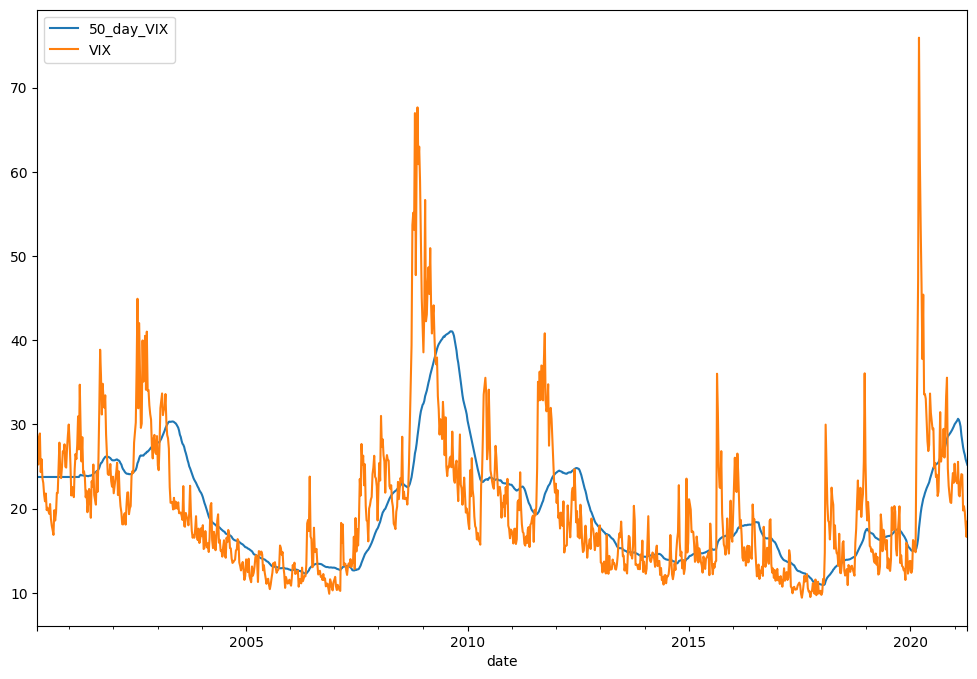

In [8]:
df['50_day_VIX'] = df['VIX'].rolling(window=50).mean()
df['50_day_VIX'] = df['50_day_VIX'].bfill()
df[['50_day_VIX', 'VIX']].plot(figsize=(12, 8))

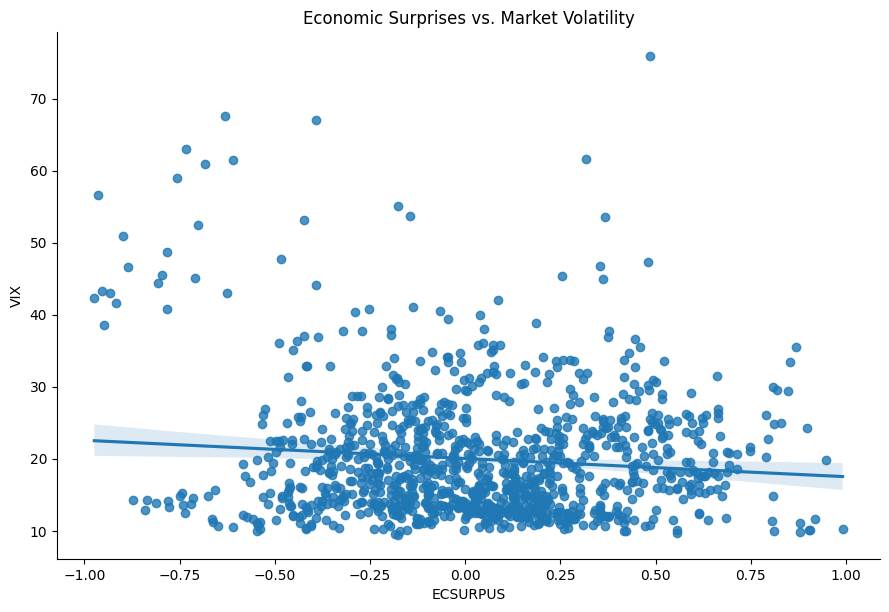

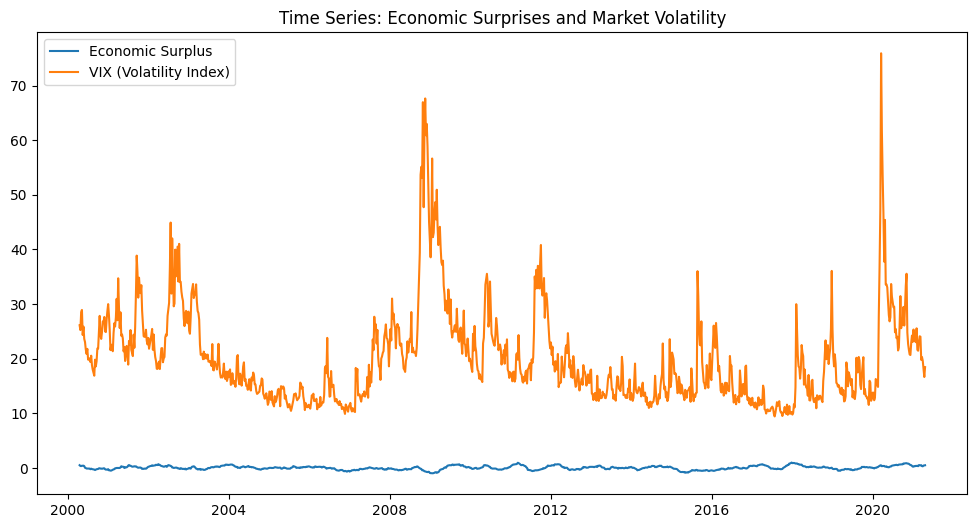

In [9]:
# Scatterplot with trendline
sns.lmplot(data=df, x="ECSURPUS", y="VIX", height=6, aspect=1.5)
plt.title("Economic Surprises vs. Market Volatility")
plt.show()

# Time series overlay
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df.index, df['ECSURPUS'], label="Economic Surplus")
ax.plot(df.index, df['VIX'], label="VIX (Volatility Index)")
ax.legend()
plt.title("Time Series: Economic Surprises and Market Volatility")
plt.show()

# Visualizations for GOLD

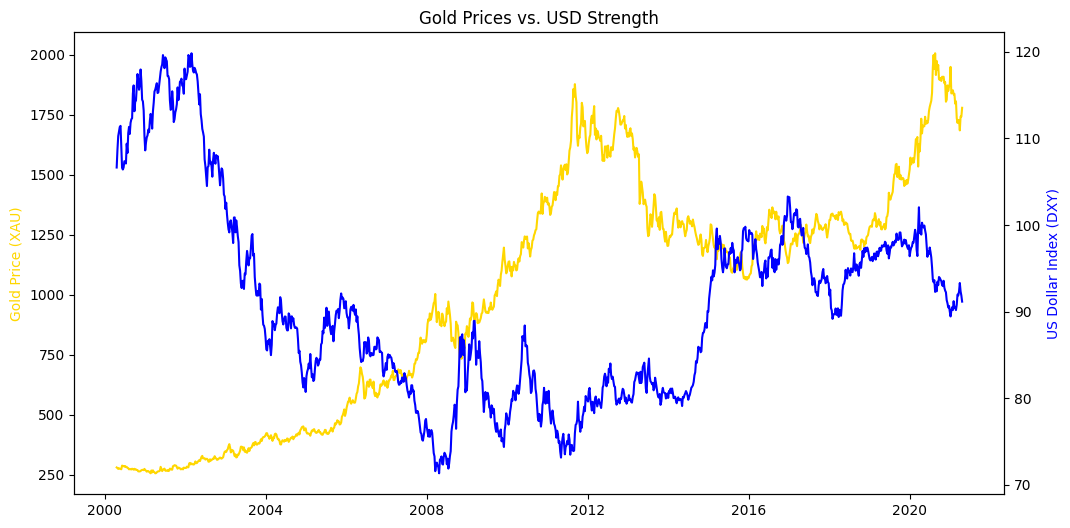

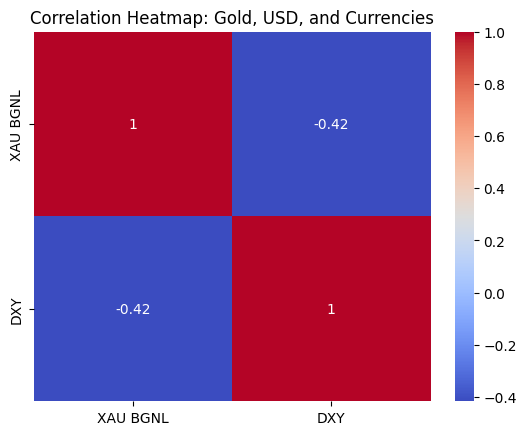

In [10]:
# Dual-axis line graph
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax1.plot(df.index, df['XAU BGNL'], color='gold', label='Gold Price')
ax2.plot(df.index, df['DXY'], color='blue', label='USD Index')

ax1.set_ylabel('Gold Price (XAU)', color='gold')
ax2.set_ylabel('US Dollar Index (DXY)', color='blue')
plt.title("Gold Prices vs. USD Strength")
plt.show()

# Correlation heatmap
sns.heatmap(df[['XAU BGNL', 'DXY']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap: Gold, USD, and Currencies")
plt.show()

Text(0.5, 1.0, 'Gold vs VIX')

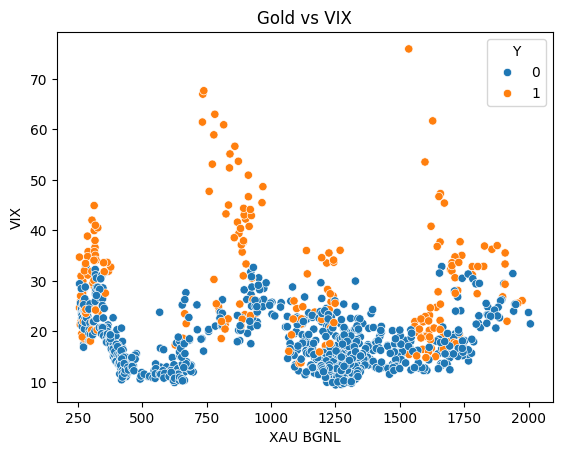

In [11]:
sns.scatterplot(x="XAU BGNL", y="VIX", data=df, hue= "Y")
plt.title('Gold vs VIX')

In [12]:
# Splitting the dataset
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Confirm the split
print(f"Training Set: {len(train)} rows")
print(f"Testing Set: {len(test)} rows")

Training Set: 877 rows
Testing Set: 220 rows


In [13]:
for lag in range(1, 6):  # Lags from 1 to 5 days
    df[f'VIX_lag_{lag}'] = df['VIX'].shift(lag)
df = df.dropna()

# Focus on the target colum Y - Prepare the Train & Test

In [14]:
from sklearn.preprocessing import StandardScaler
# Features (X) and Target (y)
X_train, y_train = train.drop(columns=['Y']), train['Y']
X_test, y_test = test.drop(columns=['Y']), test['Y']

# Scale the test and train partition
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Import ML Models

In [15]:
import pickle
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function To Evaluate and Save Models

In [16]:
from math import pi
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy =  accuracy_score(y_test, y_pred)
    print(f"{model.__class__.__name__} Accuracy: {accuracy}")
    print(f"Classification report: \n{classification_report(y_test, y_pred)}")
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print(f"Model saved as {filename}")
    print("----------")

In [17]:
xgb_model = xgb.XGBClassifier(random_state=42)
lr_model = LogisticRegression(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
nb_model = GaussianNB()
knn_model = KNeighborsClassifier()
svm_model = SVC(random_state=42)

# Begin Training

In [18]:
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, 'xgboostV1.pkl')
evaluate_and_save_model(lr_model, X_train, X_test, y_train, y_test, 'logistic_regression_V1.pkl')
evaluate_and_save_model(dt_model, X_train, X_test, y_train, y_test, 'decision_tree_V1.pkl')
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, 'random_forest_V1.pkl')
evaluate_and_save_model(nb_model, X_train, X_test, y_train, y_test, 'naive_bayes_V1.pkl')
evaluate_and_save_model(knn_model, X_train, X_test, y_train, y_test, 'knn_V1.pkl')
evaluate_and_save_model(svm_model, X_train, X_test, y_train, y_test, 'svm_V1.pkl')

XGBClassifier Accuracy: 0.8954545454545455
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       191
           1       0.62      0.52      0.57        29

    accuracy                           0.90       220
   macro avg       0.78      0.74      0.75       220
weighted avg       0.89      0.90      0.89       220

Model saved as xgboostV1.pkl
----------
LogisticRegression Accuracy: 0.9090909090909091
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       191
           1       0.76      0.45      0.57        29

    accuracy                           0.91       220
   macro avg       0.84      0.71      0.76       220
weighted avg       0.90      0.91      0.90       220

Model saved as logistic_regression_V1.pkl
----------
DecisionTreeClassifier Accuracy: 0.6954545454545454
Classification report: 
              precision    recall  f1-

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
}


rf_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc')
rf_search.fit(X_train, y_train)

print("Best Parameters:", rf_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


In [20]:
rf_model = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)
evaluate_and_save_model(rf_model, X_train, X_test, y_train, y_test, 'random_forest_V2.pkl')

RandomForestClassifier Accuracy: 0.8863636363636364
Classification report: 
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       191
           1       0.58      0.52      0.55        29

    accuracy                           0.89       220
   macro avg       0.75      0.73      0.74       220
weighted avg       0.88      0.89      0.88       220

Model saved as random_forest_V2.pkl
----------


# Oversample the majority class

---



In [21]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Retrain the model
xgb_model.fit(X_train_resampled, y_train_resampled)

evaluate_and_save_model(xgb_model, X_train_resampled, X_test, y_train_resampled, y_test, 'xgboost_oversampled.pkl')
evaluate_and_save_model(lr_model, X_train_resampled, X_test, y_train_resampled, y_test, 'logistic_regression_oversampled.pkl')
evaluate_and_save_model(dt_model, X_train_resampled, X_test, y_train_resampled, y_test, 'decision_tree_oversampled.pkl')
evaluate_and_save_model(rf_model, X_train_resampled, X_test, y_train_resampled, y_test, 'random_forest_oversampled.pkl')


XGBClassifier Accuracy: 0.8636363636363636
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       191
           1       0.49      0.59      0.53        29

    accuracy                           0.86       220
   macro avg       0.71      0.75      0.73       220
weighted avg       0.88      0.86      0.87       220

Model saved as xgboost_oversampled.pkl
----------
LogisticRegression Accuracy: 0.8954545454545455
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       191
           1       0.65      0.45      0.53        29

    accuracy                           0.90       220
   macro avg       0.79      0.71      0.74       220
weighted avg       0.88      0.90      0.89       220

Model saved as logistic_regression_oversampled.pkl
----------
DecisionTreeClassifier Accuracy: 0.5454545454545454
Classification report: 
              preci

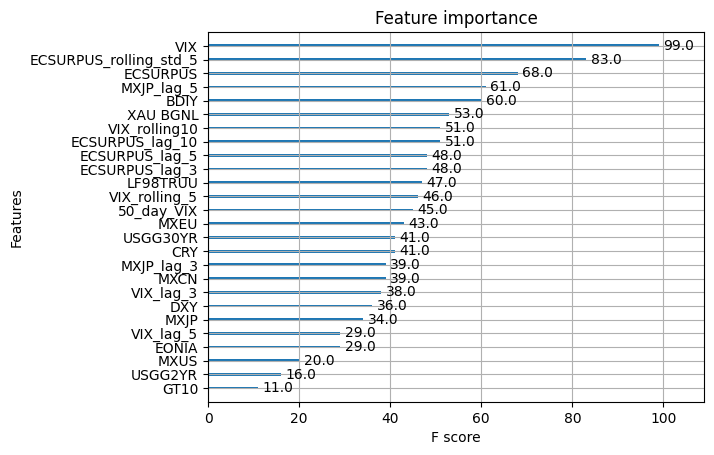

In [24]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

feature_names = train.drop(columns=['Y']).columns

booster = xgb_model.get_booster()

# Set feature names in the Booster object
booster.feature_names = feature_names.tolist()

# Plot importance using 'weight' importance type
plot_importance(booster, importance_type='weight')

plt.show()

# Penalize misclassification heavily

In [25]:

# Calculate scale_pos_weight
class_0_weight = len(y_train[y_train == 0])
class_1_weight = len(y_train[y_train == 1])
scale_pos_weight = (class_0_weight / class_1_weight)
print(f"Class 0 Weight: {class_0_weight}")
print(f"Class 1 Weight: {class_1_weight}")
print(f"Scale Positive Weight: {scale_pos_weight}")
xgb_model.set_params(scale_pos_weight=scale_pos_weight)
evaluate_and_save_model(xgb_model, X_train_resampled, X_test, y_train_resampled, y_test, 'xgboost_penalized.pkl')

Class 0 Weight: 673
Class 1 Weight: 204
Scale Positive Weight: 3.299019607843137
XGBClassifier Accuracy: 0.8909090909090909
Classification report: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       191
           1       0.58      0.62      0.60        29

    accuracy                           0.89       220
   macro avg       0.76      0.78      0.77       220
weighted avg       0.89      0.89      0.89       220

Model saved as xgboost_penalized.pkl
----------


# Show The importance of each Factor

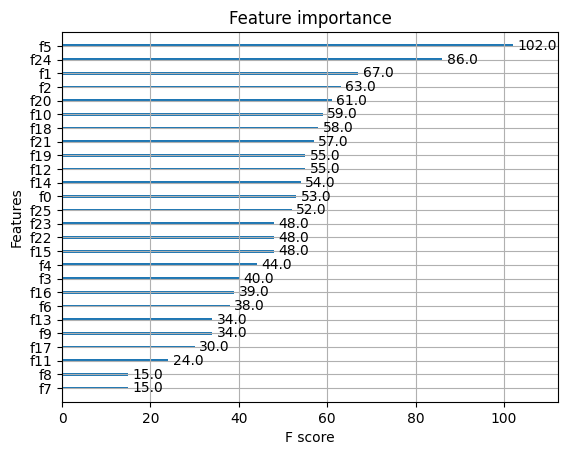

Top Features (Sorted by Importance):
VIX_rolling10: 0.18398186564445496
VIX: 0.12972727417945862
MXJP: 0.05765876919031143
VIX_rolling_5: 0.05469542741775513
XAU BGNL: 0.04791293293237686
USGG2YR: 0.04176509752869606
50_day_VIX: 0.04023085534572601
MXJP_lag_3: 0.039451923221349716
MXUS: 0.037194062024354935
ECSURPUS: 0.0363587886095047
LF98TRUU: 0.03605140373110771
BDIY: 0.035654764622449875
CRY: 0.03535425290465355
MXCN: 0.028007840737700462
MXEU: 0.02775312401354313
ECSURPUS_lag_10: 0.025263739749789238
DXY: 0.022425048053264618
VIX_lag_3: 0.020492423325777054
USGG30YR: 0.01794627495110035
MXJP_lag_5: 0.01768430322408676
GT10: 0.01324606966227293
ECSURPUS_lag_3: 0.012682612985372543
EONIA: 0.011775476858019829
ECSURPUS_rolling_std_5: 0.011282871477305889
VIX_lag_5: 0.009201869368553162
ECSURPUS_lag_5: 0.006200886331498623


In [26]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model, importance_type='weight')
plt.show()

feature_names = train.drop(columns=['Y']).columns
importance_df = pd.DataFrame({'feature': feature_names, 'importance': xgb_model.feature_importances_})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by=['importance'], ascending=False)

# Print the sorted features
print("Top Features (Sorted by Importance):")
for index, row in importance_df.iterrows():
    print(f"{row['feature']}: {row['importance']}")